In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../input/temperature-forecast-project-using-ml/temp.csv')

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

In [5]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


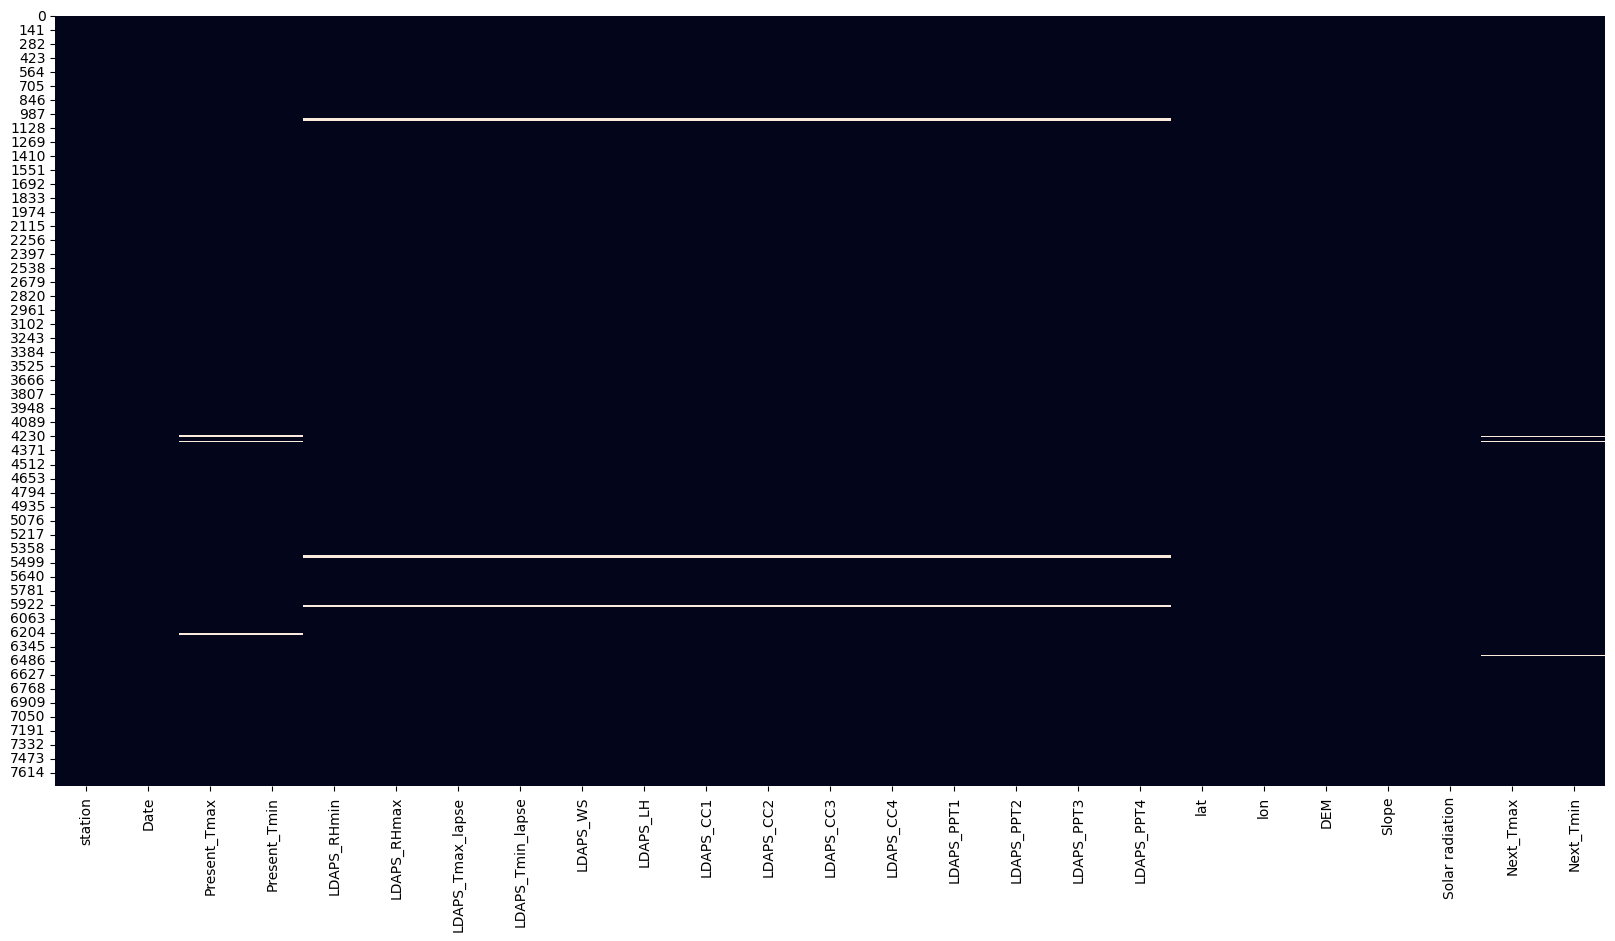

LDAPS_CC3           0.967492
LDAPS_PPT4          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT1          0.967492
LDAPS_CC4           0.967492
LDAPS_CC2           0.967492
LDAPS_CC1           0.967492
LDAPS_LH            0.967492
LDAPS_WS            0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_RHmax         0.967492
LDAPS_RHmin         0.967492
LDAPS_PPT3          0.967492
Present_Tmin        0.902993
Present_Tmax        0.902993
Next_Tmax           0.348297
Next_Tmin           0.348297
Date                0.025800
station             0.025800
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
dtype: float64


In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()
print((df.isna().sum()/df.shape[0]*100).sort_values(ascending=False))

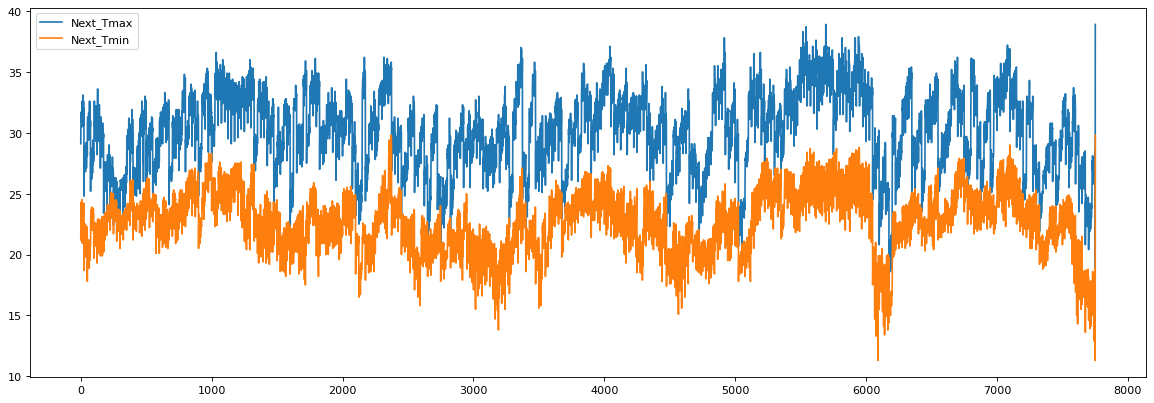

In [12]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(df["Next_Tmax"],label="Next_Tmax")
plt.plot(df["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

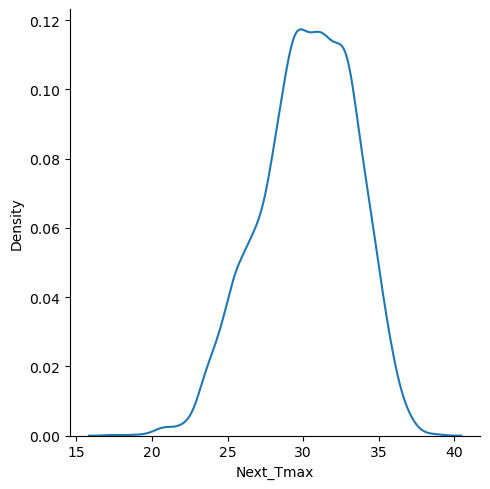

<Figure size 640x480 with 0 Axes>

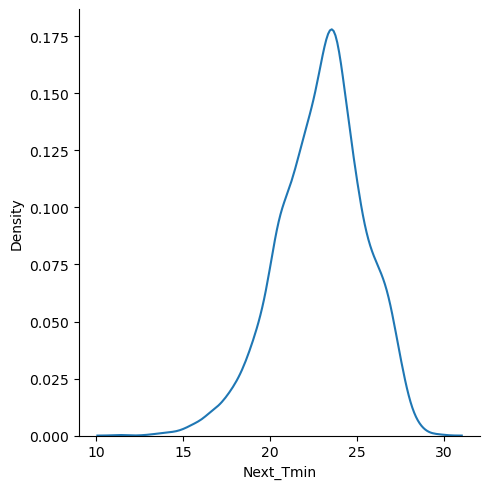

30.274886731391586
3.128010057855771
22.93222006472492
2.487612771331046


In [13]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
print(df["Next_Tmax"].mean())
print(df["Next_Tmax"].std())
print(df["Next_Tmin"].mean())
print(df["Next_Tmin"].std())


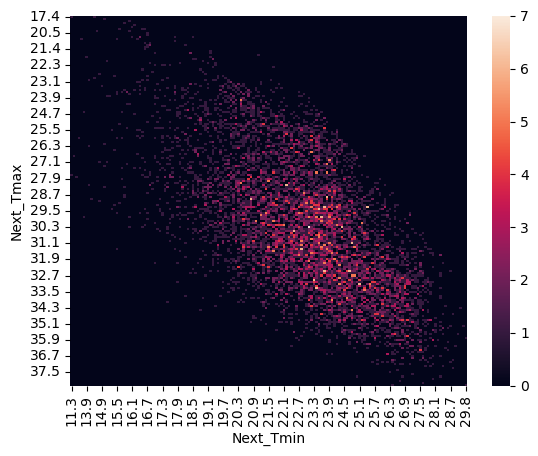

In [14]:
plt.figure()
sns.heatmap(pd.crosstab(df['Next_Tmax'],df['Next_Tmin']))
plt.show()

<AxesSubplot:>

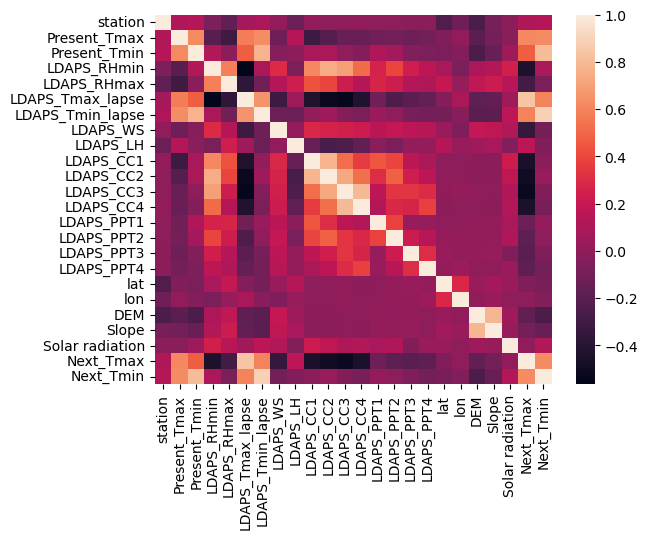

In [15]:
sns.heatmap(df.corr())

<AxesSubplot:title={'center':'Next day min Temperature Vs Present day min Temperature'}, xlabel='Present_Tmin', ylabel='Next_Tmin'>

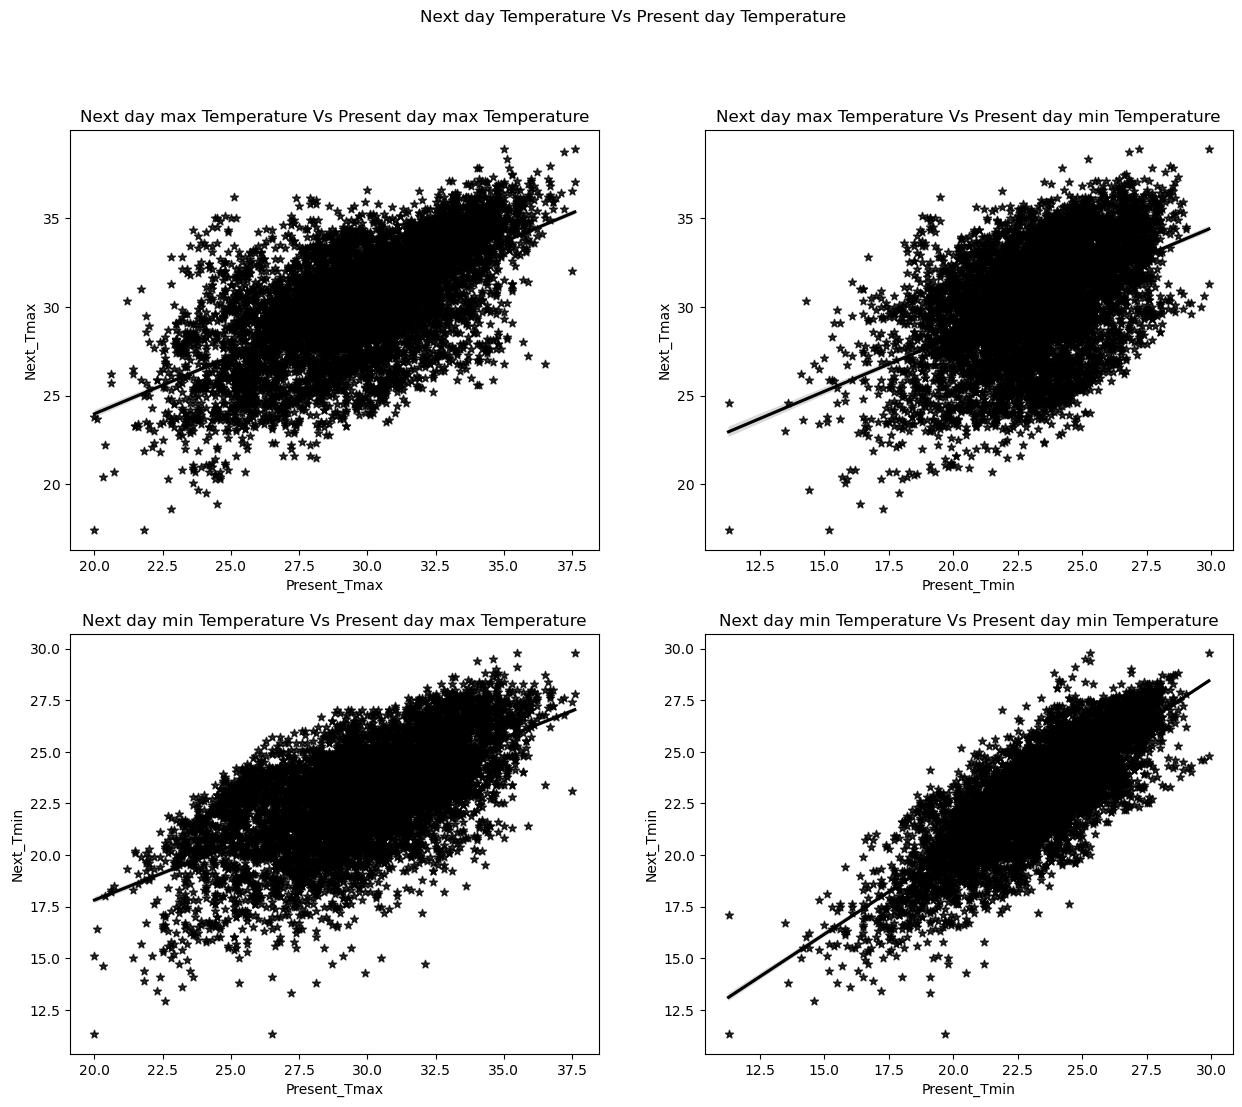

In [16]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperature Vs Present day Temperature')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df,marker='*',color='k')

<AxesSubplot:title={'center':'Next day min Temperatures Vs Present day min Relative Humidity'}, xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

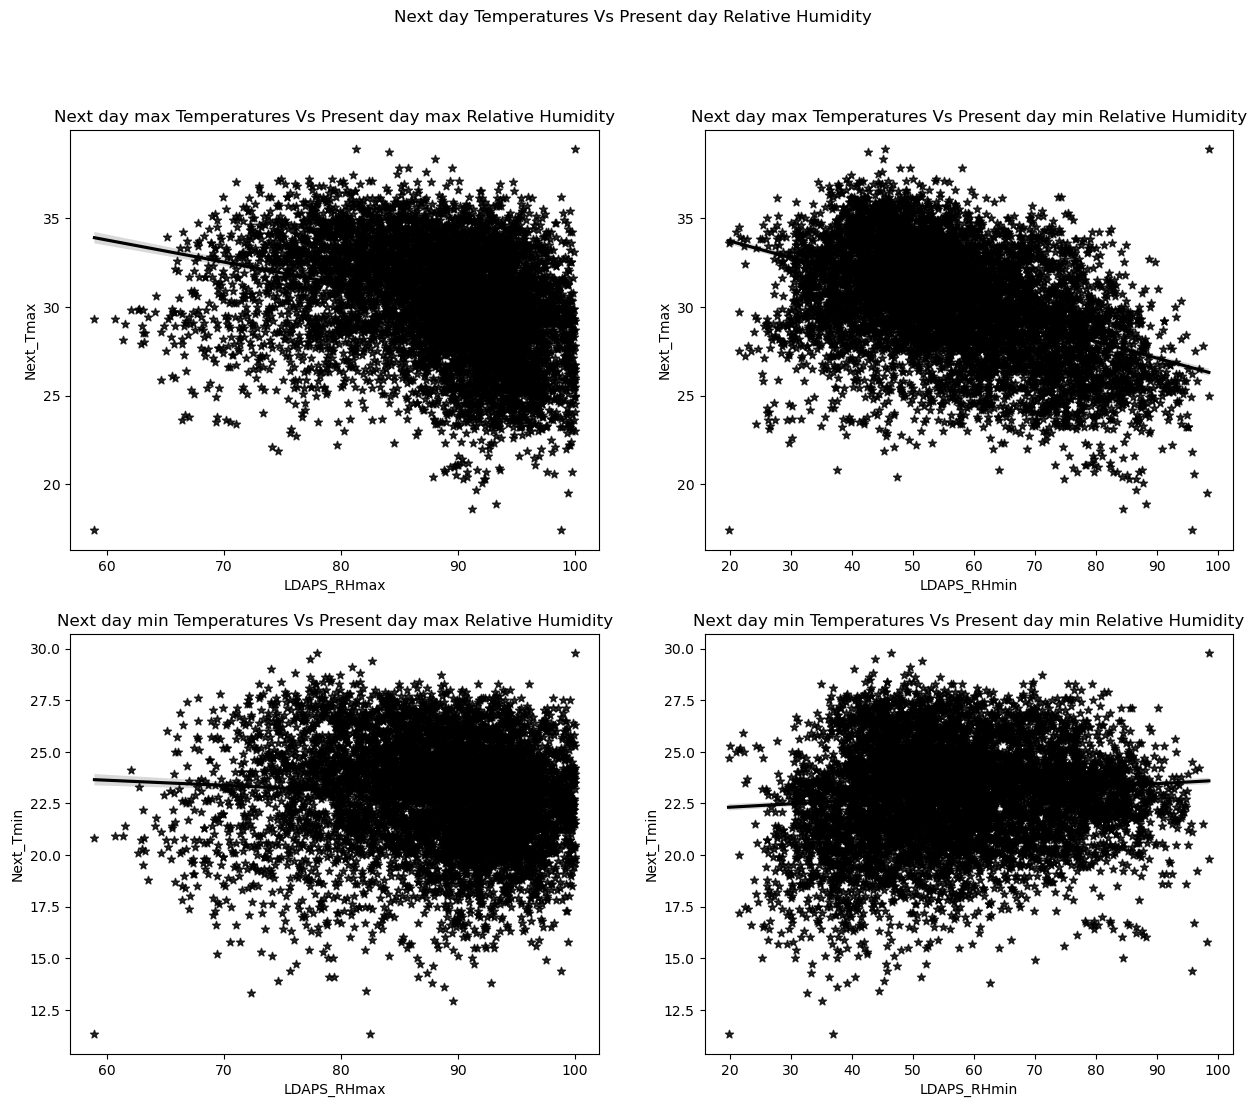

In [17]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperatures Vs Present day Relative Humidity')

plt.subplot(2,2,1)
plt.title('Next day max Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=df,marker='*',color='k')

In [18]:
df.drop('Date',axis=1,inplace=True)

In [19]:
df['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

In [20]:
df['Slope'].replace({0.0984746:0.0985,5.17823:5.1782},inplace=True)

(array([0]), [Text(0, 0, '0')])

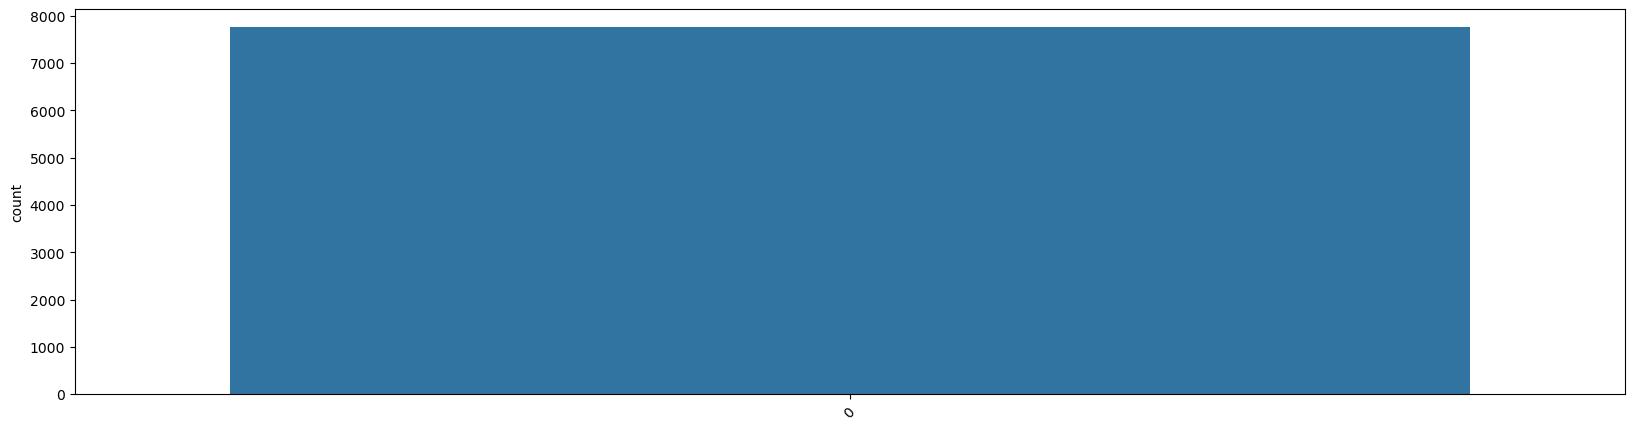

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(df['Slope'])
plt.xticks(rotation=45)

In [22]:
from scipy.stats import mode

In [23]:

df=df[df['Next_Tmax'].notnull()]

In [24]:
table=pd.pivot_table(values='station',index='Slope',data=df)
table.head()

,station
Slope,
0.0985,7.0
0.1332,22.0
0.1457,6.0
0.1554,23.0
0.2223,24.0


In [25]:
def sta(x):
    return table.loc[x['Slope'],'station']

df['station'].fillna(df[df['station'].isnull()].apply(sta,axis=1),inplace=True)

In [26]:
df.dropna(subset=df.columns, thresh=14,inplace=True)

In [27]:
df.dropna(inplace=True)

<AxesSubplot:>

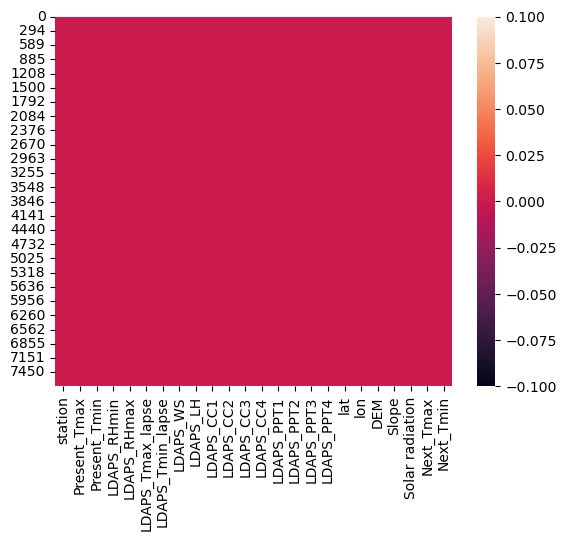

In [28]:
sns.heatmap(df.isnull())

In [29]:
from scipy.stats import zscore

In [30]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [31]:
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 11.09%
With threshold 3.2 data loss is 9.51%
With threshold 3.4 data loss is 8.38%
With threshold 3.6 data loss is 7.56%
With threshold 3.8 data loss is 6.89%
With threshold 4.0 data loss is 6.25%
With threshold 4.2 data loss is 5.8%
With threshold 4.4 data loss is 5.19%
With threshold 4.6 data loss is 4.74%
With threshold 4.8 data loss is 4.37%


In [32]:
#We use threshold as 4.2 because data is expensive and upon evaluation of models this threhold turned out to be the best.
df=df[(z<4.2).all(axis=1)]

In [33]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [34]:
#Separating categorical and continuous variables
cont=[i for i in df.columns if df[i].nunique()>30 and i!='Date']
cat=[i for i in df.columns if df[i].nunique()<30]

In [35]:
for i in cont:
    if np.abs(df[i].skew())>=0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

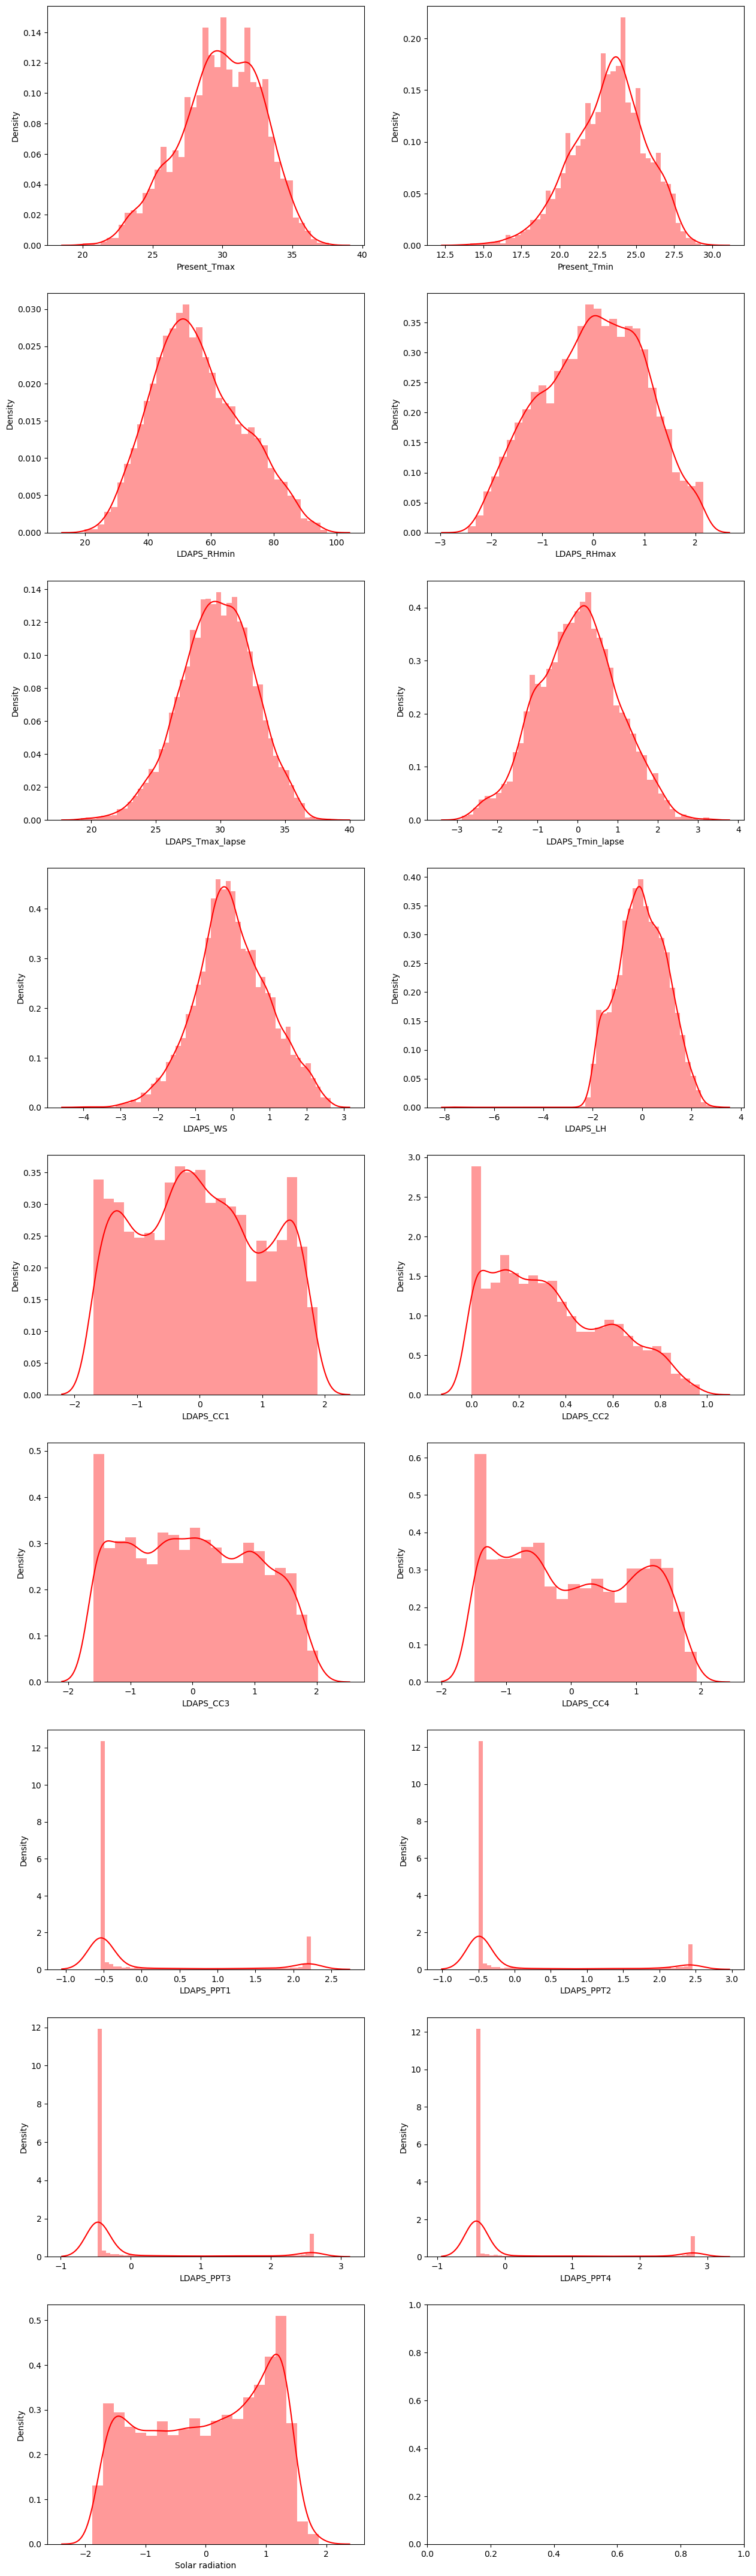

In [36]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='r',ax=ax[r,c])
    c+=1

In [37]:
#Separating dependent and independent features.
x=df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']

In [38]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [39]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score

In [41]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [43]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [44]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [45]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross Validation Score']=mcv
    data.set_index('Model',inplace = True)
    return data   

In [46]:
createmodels(models,x,ymax,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,1.0486,1.9802,1.4072,7.000000e+01,46.0
SVR,0.8697,1.4167,1.1903,8.000000e+01,65.0
LinearRegression,1.0466,1.9357,1.3913,7.200000e+01,70.0
Lasso,2.4591,9.0494,3.0082,-1.792426e+31,-7.0
Ridge,1.0470,1.9379,1.3921,7.200000e+01,70.0
DecisionTreeRegressor,1.1093,2.3930,1.5469,7.300000e+01,45.0
RandomForestRegressor,0.7318,0.9450,0.9721,8.700000e+01,68.0
AdaBoostRegressor,1.1690,2.1127,1.4535,6.200000e+01,66.0
GradientBoostingRegressor,0.8872,1.3519,1.1627,8.100000e+01,70.0


In [47]:
createmodels(models,x,ymin,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,0.8176,1.1781,1.0854,7.200000e+01,47.0
SVR,0.6259,0.6434,0.8021,8.700000e+01,75.0
LinearRegression,0.7751,0.9477,0.9735,8.200000e+01,78.0
Lasso,1.9866,6.1585,2.4816,-4.879260e+31,-14.0
Ridge,0.7752,0.9478,0.9736,8.100000e+01,78.0
DecisionTreeRegressor,0.8548,1.3903,1.1791,7.700000e+01,57.0
RandomForestRegressor,0.5773,0.5667,0.7528,8.900000e+01,78.0
AdaBoostRegressor,0.8605,1.1364,1.0660,7.600000e+01,74.0
GradientBoostingRegressor,0.6445,0.6657,0.8159,8.700000e+01,80.0


In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymax)
print(m1.best_params_)

{'alpha': 0.001}


In [50]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymax)

Lasso(alpha=0.001)

In [51]:
importance = np.abs(m1.coef_)

In [52]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,station,0.414667
1,Present_Tmax,2.892366
2,Present_Tmin,0.439141
3,LDAPS_RHmin,1.867211
4,LDAPS_RHmax,0.033401
5,LDAPS_Tmax_lapse,12.237564
6,LDAPS_Tmin_lapse,1.275452
7,LDAPS_WS,1.797137
8,LDAPS_LH,2.668634
9,LDAPS_CC1,0.298872


In [53]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymin)
print(m1.best_params_)

{'alpha': 0.001}


In [54]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymin)

Lasso(alpha=0.001)

In [55]:
importance = np.abs(m1.coef_)

In [56]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

,Features,Coefficients
0,station,0.000000
1,Present_Tmax,0.946818
2,Present_Tmin,3.799765
3,LDAPS_RHmin,1.725961
4,LDAPS_RHmax,0.567889
5,LDAPS_Tmax_lapse,2.436989
6,LDAPS_Tmin_lapse,8.335946
7,LDAPS_WS,0.608111
8,LDAPS_LH,0.228965
9,LDAPS_CC1,0.000000


In [57]:
xlasso=x.drop('station',axis=1)

In [58]:
createmodels(models,xlasso,ymin,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,0.7216,0.9345,0.9667,7.900000e+01,46.0
SVR,0.6172,0.6219,0.7886,8.800000e+01,75.0
LinearRegression,0.7749,0.9475,0.9734,8.200000e+01,78.0
Lasso,1.9866,6.1585,2.4816,-4.879260e+31,-14.0
Ridge,0.7751,0.9476,0.9735,8.100000e+01,78.0
DecisionTreeRegressor,0.8597,1.3615,1.1669,7.800000e+01,56.0
RandomForestRegressor,0.5744,0.5586,0.7474,8.900000e+01,78.0
AdaBoostRegressor,0.8676,1.1465,1.0708,7.500000e+01,75.0
GradientBoostingRegressor,0.6432,0.6569,0.8105,8.700000e+01,80.0


In [59]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(x,ymax,test_size=0.25,random_state=randomstate(x,ymax))

In [60]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200,
                     230, 250,265, 270, 275, 290, 300, 500,1000]}

In [61]:
g=GridSearchCV(Ridge(),params,cv=10)

In [62]:
g.fit(xtrain_max,ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [63]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

Ridge(alpha=0.1)
{'alpha': 0.1}
0.7637525257397387


In [64]:
m=Ridge(alpha=0.1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [65]:
score=cross_val_score(m,x,ymax,cv=10)

In [66]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 1.0466
Mean Squared Error is 1.9358
Root Mean Squared Error is 1.3913
R2 Score is 72.11999999999999
Mean of cross validaton Score is 66.4305


In [67]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

In [70]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [71]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=15, min_samples_leaf=4, n_estimators=200)
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 15}
0.8817843551727824


In [72]:
m=RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=3,n_estimators=200)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [73]:
score=cross_val_score(m,x,ymax,cv=10)

In [74]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.7443
Mean Squared Error is 0.9809
Root Mean Squared Error is 0.9904
R2 Score is 86.65
Mean of cross validaton Score is 64.9028


In [75]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [76]:
g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

In [77]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [78]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=8, n_estimators=400, subsample=0.5)
0.9179472093070954


In [79]:
m=GradientBoostingRegressor(max_depth=7, n_estimators=500, subsample=1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [80]:
score=cross_val_score(m,x,ymax,cv=10)

In [81]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6275
Mean Squared Error is 0.7036
Root Mean Squared Error is 0.8388
R2 Score is 91.18
Mean of cross validaton Score is 63.6794


In [82]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [83]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10,n_jobs=-2)

In [84]:
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
       

In [85]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
{'min_child_weight': 5, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}
0.915077502954326


In [86]:
m=XGBRegressor(colsample_bytree=0.4,gamma=0.3,learning_rate=0.1,max_depth=10, min_child_weight=10)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [87]:
score=cross_val_score(m,x,ymax,cv=10)

In [88]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.672
Mean Squared Error is 0.7721
Root Mean Squared Error is 0.8787
R2 Score is 89.92999999999999
Mean of cross validaton Score is 65.5137
